In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
### End of distribution means adding std value either from positive side of the data or from the negative side of the data if variable is folowing normal distribution 
#   If variable is skewness means we can use IQR concepts 

In [7]:
import warnings
warnings.filterwarnings("ignore")

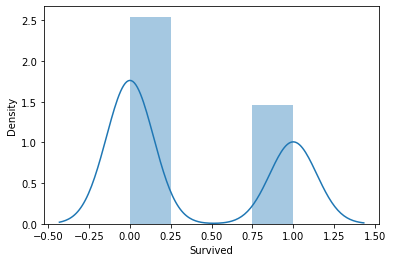

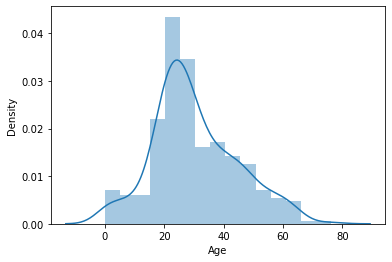

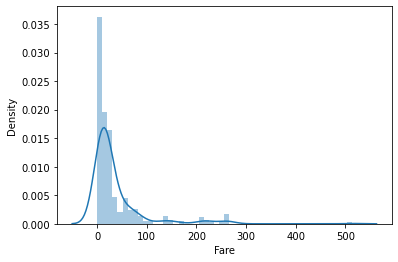

In [8]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

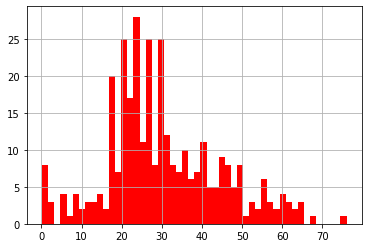

In [9]:
df['Age'].hist(bins = 50 , color = 'r')

In [10]:
val = df['Age'].mean() + 3 * df['Age'].std()

In [11]:
val

72.81621806831905

In [12]:
df['Age_replaced'] = df['Age'].fillna(val)

In [13]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_replaced'], dtype='object')

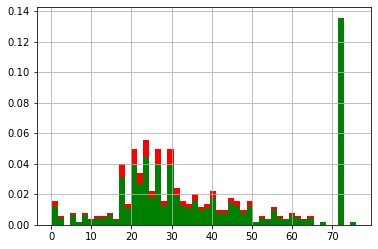

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

df['Age'].hist(bins = 50 , density = True , color = 'r' , label = 'Age')
df['Age_replaced'].hist(bins = 50 , density = True , color = 'g' , label = 'Age_replaced')
plt.show()

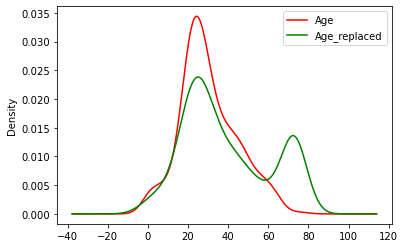

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

df['Age'].plot(kind = 'kde' , color = 'r' , label = 'Age')
df['Age_replaced'].plot(kind = 'kde', color = 'g' , label = 'Age_replaced')
plt.legend(loc = 0)
plt.show()

In [20]:
print("Age cov = {} ".format(df['Age'].var()))
print("Age replaced cov = {} ".format(df['Age_replaced'].var()))

Age cov = 201.10669538455937 
Age replaced cov = 456.1099759021278 


In [21]:
df.cov()

,Survived,Age,Fare,Age_replaced
Survived,0.231960,-0.000088,5.159417,-0.640032
Age,-0.000088,201.106695,291.838610,201.106695
Fare,5.159417,291.838610,3125.657074,49.849780
Age_replaced,-0.640032,201.106695,49.849780,456.109976


<AxesSubplot:>

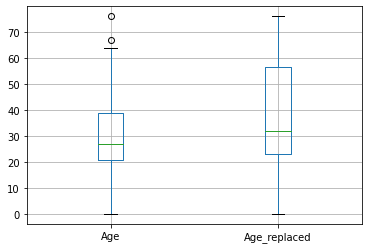

In [23]:
df[['Age','Age_replaced']].boxplot()

## If variables following skewness means we need to use a technique called IQR

In [26]:
df.isnull().sum()

Survived         0
Age             86
Fare             1
Age_replaced     0
dtype: int64

In [30]:
IQR = df['Fare'].quantile(0.75) - df['Age'].quantile(0.25)
IQR

10.5

In [31]:
c = df['Fare'].quantile(0.75) + 3 * IQR

In [32]:
c

63.0

In [33]:
df['Fare_replaced'] = df['Fare'].fillna(c)

In [34]:
df.isnull().sum()

Survived          0
Age              86
Fare              1
Age_replaced      0
Fare_replaced     0
dtype: int64

In [36]:
print("fare var = {} ".format(df['Fare'].var()))
print("fare var replaced = {} ".format(df['Fare_replaced'].var()))


fare var = 3125.6570743195775 
fare var replaced = 3119.9540077051574 


In [38]:
df.cov()

,Survived,Age,Fare,Age_replaced,Fare_replaced
Survived,0.231960,-0.000088,5.159417,-0.640032,5.123175
Age,-0.000088,201.106695,291.838610,201.106695,292.967631
Fare,5.159417,291.838610,3125.657074,49.849780,3125.657074
Age_replaced,-0.640032,201.106695,49.849780,456.109976,51.139865
Fare_replaced,5.123175,292.967631,3125.657074,51.139865,3119.954008


<AxesSubplot:>

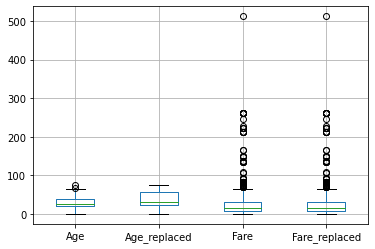

In [39]:
df[['Age','Age_replaced','Fare','Fare_replaced']].boxplot()

### using feature engine 

In [42]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [1]:
from feature_engine.imputation import EndTailImputer  # End of distribution 

In [44]:
e = EndTailImputer(imputation_method='gaussian',tail='right')

In [45]:
e

EndTailImputer()

In [46]:
e.fit(df)

EndTailImputer()

In [47]:
e.variables_

['Survived', 'Age', 'Fare']

In [48]:
e.imputer_dict_

{'Survived': 1.8085027864330554,
 'Age': 72.81621806831905,
 'Fare': 203.3499170291301}

In [49]:
df['Age'].mean() + 3 *  df['Age'].std()

72.81621806831905

In [50]:
t = e.transform(df)

In [51]:
t.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [60]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [61]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [62]:
e = EndTailImputer(imputation_method='iqr' ,tail='left',variables=['Fare'])

In [63]:
e.fit(df)

EndTailImputer(imputation_method='iqr', tail='left', variables=['Fare'])

In [64]:
e.variables_

['Fare']

In [65]:
e.imputer_dict_

{'Fare': -62.9168}

In [66]:
s = e.transform(df)

In [68]:
s.isnull().sum()

Survived     0
Age         86
Fare         0
dtype: int64